# Linear Regression with Batch Gradient Descent

You will train your model using a real world dataset.  The dataset contains a collection of real estate listings in San Luis Obispo county.

https://wiki.csc.calpoly.edu/datasets/wiki/Houses

To make it simpler for this assignment, the dataset has been slightly modified.  It contains the following fields:

1.	MLS: Multiple listing service number for the house (unique ID).
2.	Price: the most recent listing price of the house (in dollars).
3.	Bedrooms: number of bedrooms.
4.	Bathrooms: number of bathrooms.
5.	Size: size of the house in square feet.
6.	Price/SQ.ft: price of the house per square foot.

The model predict the housing price given the square footage of the house.


In [86]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt

# read dataset
df = pd.read_csv("/housing_price_data.csv")

df.head()

,MPLS,Price,Bedrooms,Bathrooms,Size,PriceSq
0,132842,795000,3,3,2371,335.30
1,134364,399000,4,3,2818,141.59
2,135141,545000,4,3,3032,179.75
3,135712,909000,4,4,3540,256.78
4,136282,109900,3,1,1249,87.99


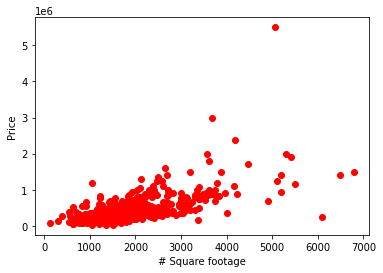

In [87]:
# Plot data points
X, y = (df["Size"].values,df["Price"].values)
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

# plots the data points
plt.plot(X, y, 'ro')
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()

In [88]:
# Normalize the house size, e.g., subtract min and divide by (max-min) to ensure 
# the scale is compatible with the bias, which is 1
max_min = X.max(0) - X.min(0)
Xmin = X.min(0)
X = (X-Xmin) / max_min

# Add bias
z = np.ones((len(X),1)) 
X = X.reshape(len(X),1)
X = np.concatenate((z,X), axis=1)                
y = y.reshape(len(X),1) 

# sort for testing/plotting
Xsort = np.sort(X, axis=0)

print(X.shape)
print(y.shape)

(781, 2)
(781, 1)


## Perform gradient descent

In [89]:
# Initialize vector w 
np.random.seed(20)
w = np.random.rand(2,1)

# Learning rate
nu = 0.01

N = len(y)

# Number of epochs
MAX_EPOCHS = 2000

mse_array = []  

# Loop for 2000 epochs
for itr in range (0, MAX_EPOCHS):
    # X_train is 781x1 and y_train is 781x1
    error = np.matmul(X,w) - y
    temp_w0 = w[0][0] - nu*np.sum(error)/N
    temp_w1 = w[1][0] - (nu*np.sum(np.dot(X[:,1:2].transpose(), error)))/N

    w[0][0] = temp_w0
    w[1][0] = temp_w1

    # TO DO: compute mse
    mse = np.sum(np.square(error))
    mse = mse/(2*N)
    
    # Store MSE results for the plot
    mse_array.append(mse)

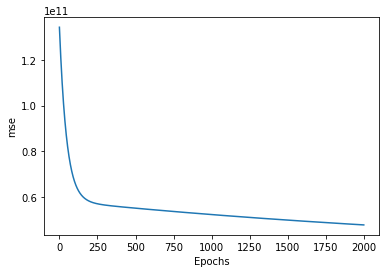

In [90]:
### Plot mse vs iterations
plt.plot(mse_array)  #
plt.xlabel("Epochs")
plt.ylabel("mse")
plt.show()

In [92]:
### Print the weight vector w
print('W gradient descent ::\n')
print (w)

W gradient descent ::

[[257032.99535752]
 [535468.30618548]]


# **Perform OLS**

In [93]:
XT = X.transpose()
Wols = np.matmul(np.matmul(np.linalg.inv(np.matmul(XT, X)), XT,), y)

print('W OLS ::\n')
print(Wols)

W OLS ::

[[ -79539.00375127]
 [1891038.30009269]]


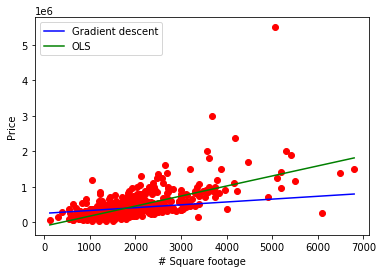

In [94]:
### Plot the fitted curve

yhat = np.dot(np.sort(X, axis=0),w)
yols = np.dot(np.sort(X, axis=0),Wols)
plt.plot(X[:,1] * max_min + Xmin, y, 'ro')
plt.plot(Xsort[:,1] *max_min + Xmin, yhat, 'b', label="Gradient descent")
plt.plot(Xsort[:,1] *max_min + Xmin, yols, 'g', label="OLS")
plt.legend()
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()


# **Tuning GD Hyperparameters**(Grid Search)


In [95]:
# Initialize vector w 
np.random.seed(20)
w = np.random.rand(2,1)
bestw = w

# learning rate
nu_array = [0.01, 0.02, 0.04, 0.08]

# max number of epochs
max_epoch_array = [2000, 4000, 8000, 16000, 20000]

# diff of w1 in OLS and gradient descent (tune to minimize this)
slope_diff = abs(w[1][0] - Wols[1][0])
N = len(y)
for nu in nu_array:
  for MAX_EPOCHS in max_epoch_array:
    for itr in range (0, MAX_EPOCHS):
        error = np.matmul(X,w) - y
        temp_w0 = w[0][0] - nu*np.sum(error)/N
        temp_w1 = w[1][0] - (nu*np.sum(np.dot(X[:,1:2].transpose(), error)))/N

        w[0][0] = temp_w0
        w[1][0] = temp_w1

        if(abs(w[1][0] - Wols[1][0]) < slope_diff):
          slope_diff = abs(w[1][0] - Wols[1][0])
          bestw = w

w = bestw
print('W after tuning GD hyperparameters ::')
print(w)

W after tuning GD hyperparameters ::
[[ -79539.00375124]
 [1891038.30009259]]


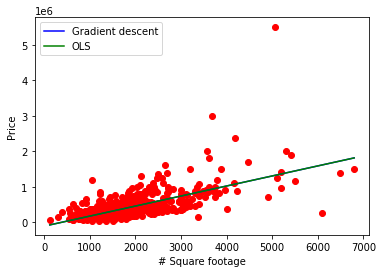

In [96]:
### Plot the fitted curve

yhat = np.dot(np.sort(X, axis=0),w)
yols = np.dot(np.sort(X, axis=0),Wols)
plt.plot(X[:,1] * max_min + Xmin, y, 'ro')
plt.plot(Xsort[:,1] *max_min + Xmin, yhat, 'b', label="Gradient descent")
plt.plot(Xsort[:,1] *max_min + Xmin, yols, 'g', label="OLS")
plt.legend()
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()


In [97]:
### Predict the price of a 5000 sqft house
### Remember to normalize it first
print('Prediction using gradient descent ::')
print(w[0][0] + w[1][0]*((5000-Xmin)/max_min))
print('\n')
print('Prediction using OLS ::')
print(Wols[0][0] + Wols[1][0]*((5000-Xmin)/max_min))


Prediction using gradient descent ::
[1301938.07775352]


Prediction using OLS ::
[1301938.07775357]
